# Effects of Loan Properties on Borrower's APR
## by Ifeanyichukwu Obute

## Investigation Overview

In this investigation, I would like to discover what are the major loan features for predicting the borrower's annual percentage rate (APR) for the loan.. The main focus was on the stated monthly income, monthly loan payment, and the characteristics of the borrowers APR


## Dataset Overview

The studied data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. provided by Prosper Marketplace, California-based pioneering company in the peer-to-peer lending industry in the U.S.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
cols = ['MonthlyLoanPayment', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan = loans[cols]
# data wrangling, remove loans with missing borrower APR information
loan = loan[~loan.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan = loan[loan.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['AA', 'A', 'B', 'c', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_var)
loan.shape

(113585, 6)

## Distribution of Borrower APR
The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

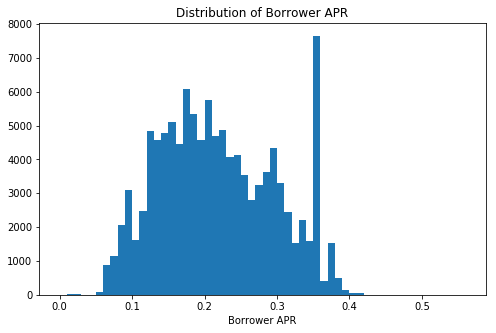

In [4]:

bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

## Borrower APR vs. Monthly Loan Payment

At different size of the monthly loan payment, the APR has a large range, but the range of APR decrease with the increase of loan payment. Overall, the borrower APR decrease with increase of monthly loan payment

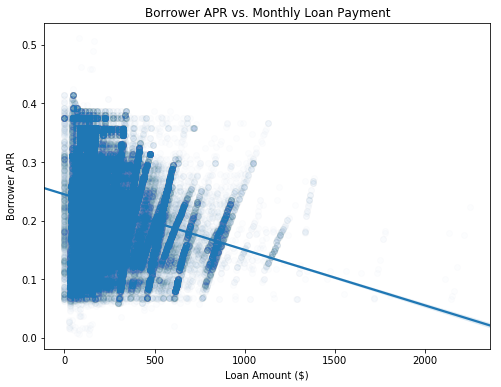

In [5]:

plt.figure(figsize = [8, 6])
sb.regplot(data = loan, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Monthly Loan Payment');

## Borrower APR vs. Prosper Rating

The borrower APR increases with the increasingly better rating. Borrowers with the best Prosper ratings have the highest APR. It means that the Prosper rating has a strong effect on borrower APR.

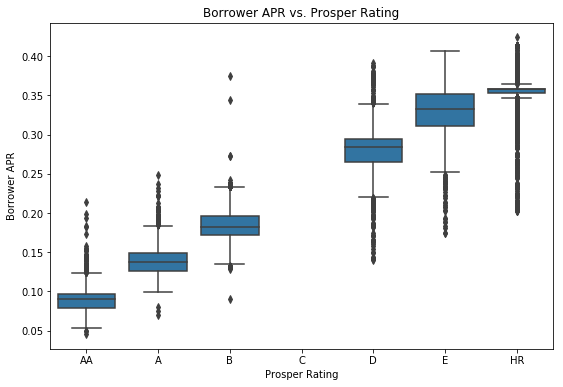

In [6]:

plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color, order = rate_order)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 